<a href="https://colab.research.google.com/github/subh-775/Academicia/blob/main/SA_with_trainable_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
 <a href="https://github.com/subh-775/LLMs_architecture">
        <img src="https://badges.aleen42.com/src/github.svg" alt="GitHub Repository" />
  </a>

 <a href="https://youtube.com/playlist?list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&si=CQYxknHX5ZFiKHRo">
        <img src="https://img.shields.io/badge/YouTube-Playlist-red?logo=youtube&logoColor=white" alt="YouTube Playlist" />
  </a>

</div>


## Understanding `Tokens`

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*QVXvydRMEWTWiUP42bYBAg.png" alt="Tokens" width="500">

### What are Tokens?  

Tokens are the fundamental units of text. They can be words, subwords, or even individual characters, depending on the tokenization strategy used.   

Tokens help LLMs understand and generate text by converting human language into numerical representations, making it possible for models to learn patterns, relationships, and context in language.


In [ ]:
import re # regular-expression library
text=" hello world. This, is a -- test?."
result=re.split(r'(\s)', text)  #(\s): wherever white-space is encounters it split the text from that.
print(result)

['', ' ', 'hello', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', '--', ' ', 'test?.']


In [ ]:
# if we want to include characters like , and . as a seperate token, we can do
a="hello world. This, is a-- test?."
result=re.split(r'([:;,.?]|\s|--)',a)
print(result)

['hello', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', '--', '', ' ', 'test', '?', '', '.', '']


In [ ]:
# whitespace will not be returned
result=[item for item in result if item.strip()]
print(result)

['hello', 'world', '.', 'This', ',', 'is', 'a', '--', 'test', '?', '.']


# Level 1: Tokenization

## understanding tokenization through a sample data: the-verdict.txt

In [ ]:
with open("the-verdict.txt", 'r', encoding="utf-8") as f:
  raw_text=f.read()

print("Total number of character: ", len(raw_text))
print(raw_text[:99])

Total number of character:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


removal of whitespaces reduce memory requirements. However, if we want to train models which are sensitive to space and indentation(python-codes), we need to pay attention to spaces as well.



In [ ]:
# If we want to remove any to tokenise other characters like [!,.?+=--_"]..etc we can go like
# result=re.split(r'([.:;"_?,)]|--|[\s]',raw_text)
import re
preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',raw_text) # closing the unclosed parenthesis. removing extra square brackets around \s as it's already a character class.
preprocessed=[item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In this way we've succesfully converted a short story into individual tokens using re

## Step 2: Creating Token ID's

In [ ]:
print(len(preprocessed))

4690


In [ ]:
all_words=sorted(set(preprocessed))
vocab_size=len(all_words)
print(vocab_size)

1130


The vocbabulary is like the dictionary where every token(word) is mapped to a integer ID


In [ ]:
vocab ={token:integer for integer, token in enumerate(all_words)}

In [ ]:
for i, item in enumerate(vocab.items()):
  print(item)
  if i>=30:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)


In this we've succesfully **encoded** our input text into tokens, and assigned a unique token id to it

## SimpleTokenizer V1 class


In [ ]:
class SimpleTokenizerV1:
  def __init__(self,vocab):
    self.str_to_int=vocab
    # Calling vocab.items() to get the iterable key-value pairs
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[
        item.strip() for item in preprocessed if item.strip()
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    # Replace spaces beforethe specified punctuations
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)
text= """"It's the last he painted, you know,"
          Mrs. Gisburn said with pardonable pride."""

In [ ]:
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

<div class = "alert alert-success alert-info">
    hence the encode and decode functions are working correctly
</div>

Since the provided text is from "the-vedict.txt" book hence the function encoded and decoded it succesfully.
But, when we provide it new input(which is not from the book), it will result in error.
Hence LLms are trained on vast amount of large data along with a technique called as : SPECIAL CONTEXT TOKENS" so that these kind of error can not occur.

## SimpleTokenizerV2 class

In [ ]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_to_int=vocab
    # Adding <|unk|> to the vocab if it's not present:
    if "<|unk|>" not in self.str_to_int:
      self.str_to_int["<|unk|>"] = len(self.str_to_int)
    # Calling vocab.items() to get the iterable key-value pairs
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed=[item.strip() for item in preprocessed if item.strip()]
    preprocessed=[
        item if item in self.str_to_int
        else "<|unk|>" for item in preprocessed
    ]
    ids=[self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text=" ".join([self.int_to_str[i] for i in ids])
    # Replace spaces beforethe specified punctuations
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tk= SimpleTokenizerV2(vocab)
text1=" hello there! How are You?"
text2="In the sunlit terraces of the palace."
text=" <|endoftext|> ".join((text1,text2))
print(text)

 hello there! How are You? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
ides=tk.encode(text)
print(ides)

[1130, 992, 0, 52, 169, 113, 10, 1130, 55, 988, 956, 984, 722, 988, 1130, 7]


In [ ]:
tk.decode(ides)

'<|unk|> there! How are You? <|unk|> In the sunlit terraces of the <|unk|>.'

The **<|unk|>**  are the unknown characters which are not present in the vocab.
In the above output after decoding we are getting unknown for "hello" and "there", since they are not present in the verdict book, hence in this way we can handle **<|unk|>** characters instead of getting error.

# Level 2 : Byte Pair encoding

```mermaid
flowchart LR
    B["Tokenization Algorithms"]

    subgraph W["Word-based Tokenization"]
        W1["Example: ['My','hobby','is','playing','cricket']"]
        W2["Advantage: Full words, intuitive"]
        W3["Disadvantage: OOV issues for unseen words"]
    end

    subgraph S["Sub-word-based Tokenization"]
        S1["Example: 'boys' → ['boy','s']"]
        S2["Advantage: Fewer OOV, handles morphological variations"]
        S3["Disadvantage: Might split frequent words unnecessarily if not tuned well"]
    end

    subgraph C["Character-based Tokenization"]
        C1["Example: ['M','y','h','o','b','b','y']"]
        C2["Advantage: No OOV problem, every character recognized"]
        C3["Disadvantage: Word meaning is lost; token sequence is longer"]
    end

    B --> W
    B --> S
    B --> C
```


<div class="alert alert-info">
    The Byte Pair Encoding is a type of sub-word based tokenization algorithm. In this algorithm the **most common pair of         consecutive bytes of data** is replaced with a byte that does not occur in data.
</div>

The BPE algorithm was used to train models like GPT-2, GPT-3 and the original model used in ChatGPT

### Using Tiktoken module : A subword based toknization algorithm

In [ ]:
!pip install tiktoken

In [ ]:
import importlib
import tiktoken

print("tiktoken version: ", importlib.metadata.version("tiktoken"))

tiktoken version:  0.9.0


<div class="alert alert-danger">
<h4>The tokenization in Subword can be character based or word-based.</h4>
</div>

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

<div class="alert alert-info alert-success">
    The usage of this tokenizer is simple to SimpleTokenizer V2 we implemented previously via an encode method:
</div>

In [ ]:
test = (
    "Hello, do you like tea? <|endoftext|> In the Unlit terraces/"
    "of someunknownPlace."
)

integers = tokenizer.encode(test, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 791, 18250, 8812, 2114, 14, 1659, 617, 34680, 27271, 13]


In [ ]:
strings=tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the Unlit terraces/of someunknownPlace.


In [ ]:
#Just for understanding purpose
ant=5025   # the GPT-2 has a vocab length of 50,257, the last token is <|endoftext|>
a=tokenizer.decode([ant])
print(a)

 stopped


In [ ]:
axer="someunknown"
numeric=tokenizer.encode(axer, allowed_special={"<|endoftext|>"})
print(numeric)

[11246, 34680]


<div class="alert alert-info">
The <|endoftext> token is assigned to a relatively large token ID, namely 50526
</div>

<div class="alert alert-warning">
The BPE is a type of Subword-based tokenization
</div>

**Let us take another simple example to illustrate how the BPE tokenizer deals with unknown tokens**

In [ ]:
newint = tokenizer.encode("chala ja <endoftext>")
print("encoded seq: ", newint)

newstr = tokenizer.decode(newint)
print("Provided text: ", newstr)

encoded seq:  [354, 6081, 45091, 1279, 437, 1659, 5239, 29]
Provided text:  chala ja <endoftext>


# Level 3 : Creating Input-Output Pairs

<div class="alert alert-info">
    Context-Length: determines how many tokens are included in the input.
</div>
<div class="alert alert-success">
    Output-Length : here is one word at a time.
</div>

<div class="alert alert-danger">
    Self- supervised learning is actually Unsupervised learning, because we   are making an input-output pair using the auto-regressive behaviour, for example see the below table.
    </div>

| Input Text                              | Target Word |
|-----------------------------------------|-----------|
| LLMs                                    | learn     |
| LLMs learn                              | to        |
| LLMs learn to                           | predict   |
| LLMs learn to predict                   | one       |
| LLMs learn to predict one               | word      |
| LLMs learn to predict one word          | at        |
| LLMs learn to predict one word at       | a         |
| LLMs learn to predict one word at a     | time      |


In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text=f.read()

enc_text=tokenizer.encode(raw_text)
print(len(raw_text))
print(len(enc_text))

20479
5145


In [ ]:
enc_sample=enc_text[50:]

In [ ]:
context_size=4
# the input x is the first 4 tokens [1,2,3,4] and the target y is the next 4 tokens [2,3,4,5]
x = enc_sample[:context_size] #1,2,3,4
y= enc_sample[1:context_size+1] # 2,3,4,5

print("X : ",x)
print(f"y:        {y}")

X :  [290, 4920, 2241, 287]
y:        [4920, 2241, 287, 257]


In [ ]:
# import torch
# x.is_tensor()

In [ ]:
# Encoded characters input-target pairing
for i in range(1, context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(context, "--->",desired)

[290] ---> 4920
[290, 4920] ---> 2241
[290, 4920, 2241] ---> 287
[290, 4920, 2241, 287] ---> 257


In [ ]:
## Decoded characters input-target pairing
for i in range(1, context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]
    print(tokenizer.decode(context), "--->",tokenizer.decode([desired]))

 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


<div class="alert alert-warning">

Hence, we've now created the input-target pairs that we can turn into use for the LLM training in upcoming chapters. </div>

<div class="alert alert-danger">
There's only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that iterates over the input dataset and returns the input and targets as PyTorch tensors, which can be thought of as multidimensional arrays.
    
</div>

<div class="alert alert-warning">
    In particular, we are interested in returning two tensors: an input tensor containing the text that the LLM sees and a target tensor that includes the targets for the LLms to predict.
</div>

### Understanding tensor representation
*"In the heart of the city stood the old library, a relic from a bygone era. Its stone walls bore the marks of time, and ivy clung tightly to its facade ..."*

#### 📌 Tensor Representation

#### 🔹 **Tensor containing the inputs (`x`)**
```python
x = tensor([
    ["In", "the", "heart", "of"],
    ["the", "city", "stood", "the"],
    ["old", "library", ",", "a"],
    ...
])

y = tensor([
    ["the", "heart", "of", "the"],
    ["city", "stood", "the", "old"],
    ["library", "a", "relic", "from"],
    ...
])

<div class="alert alert-info">
    To implement efficient dataloaders, we collect inputs in a tensor x, where each row represents one input context. the second tensor y contains the corresponding prediction targets(next words), which are created by shifting the input by one position.
</div>

# Level 4: Implementing a Data Loader

<div class="alert alert-info">

Step 1: Tokenize the entire text.

Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length.

Step 3: Return the total number of rows in the dataset.

Step 4: Return a single row from the dataset.
</div>

In [ ]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the text into overlapping sequences
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

<div class="alert alert-success">
The following code will use the GPTDatasetV1 to load the inputs in batches via a PyTorch DataLoader:
</div>

<div class="alert alert-info">
    
Step 1: Initialize the tokenizer.
    
Step 2: Create dataset.

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training.


Step 4: The number of CPU processes to use for preprocessing.</div>

## Create dataloader_v1 class

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.encoding_for_model("gpt-2")  # Fixed tokenizer initialization

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create DataLoader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

<div class="alert alert-success">
    Let's test the dataloader with a batch size of 1 for an LLM with a context size of 4, This will develop an intuition of how the GPTDatasetV1 class and the create_dataloader_v1 function work together:
</div>

In [ ]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text=f.read()

In [ ]:
import torch
import tiktoken
print("PyTorch version: ", torch.__version__)

# Create DataLoader
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

# Fetch first batch
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version:  2.6.0+cu124
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


<div class="alert alert-danger">
The below is what is stride parameter
</div>

Stride = 1


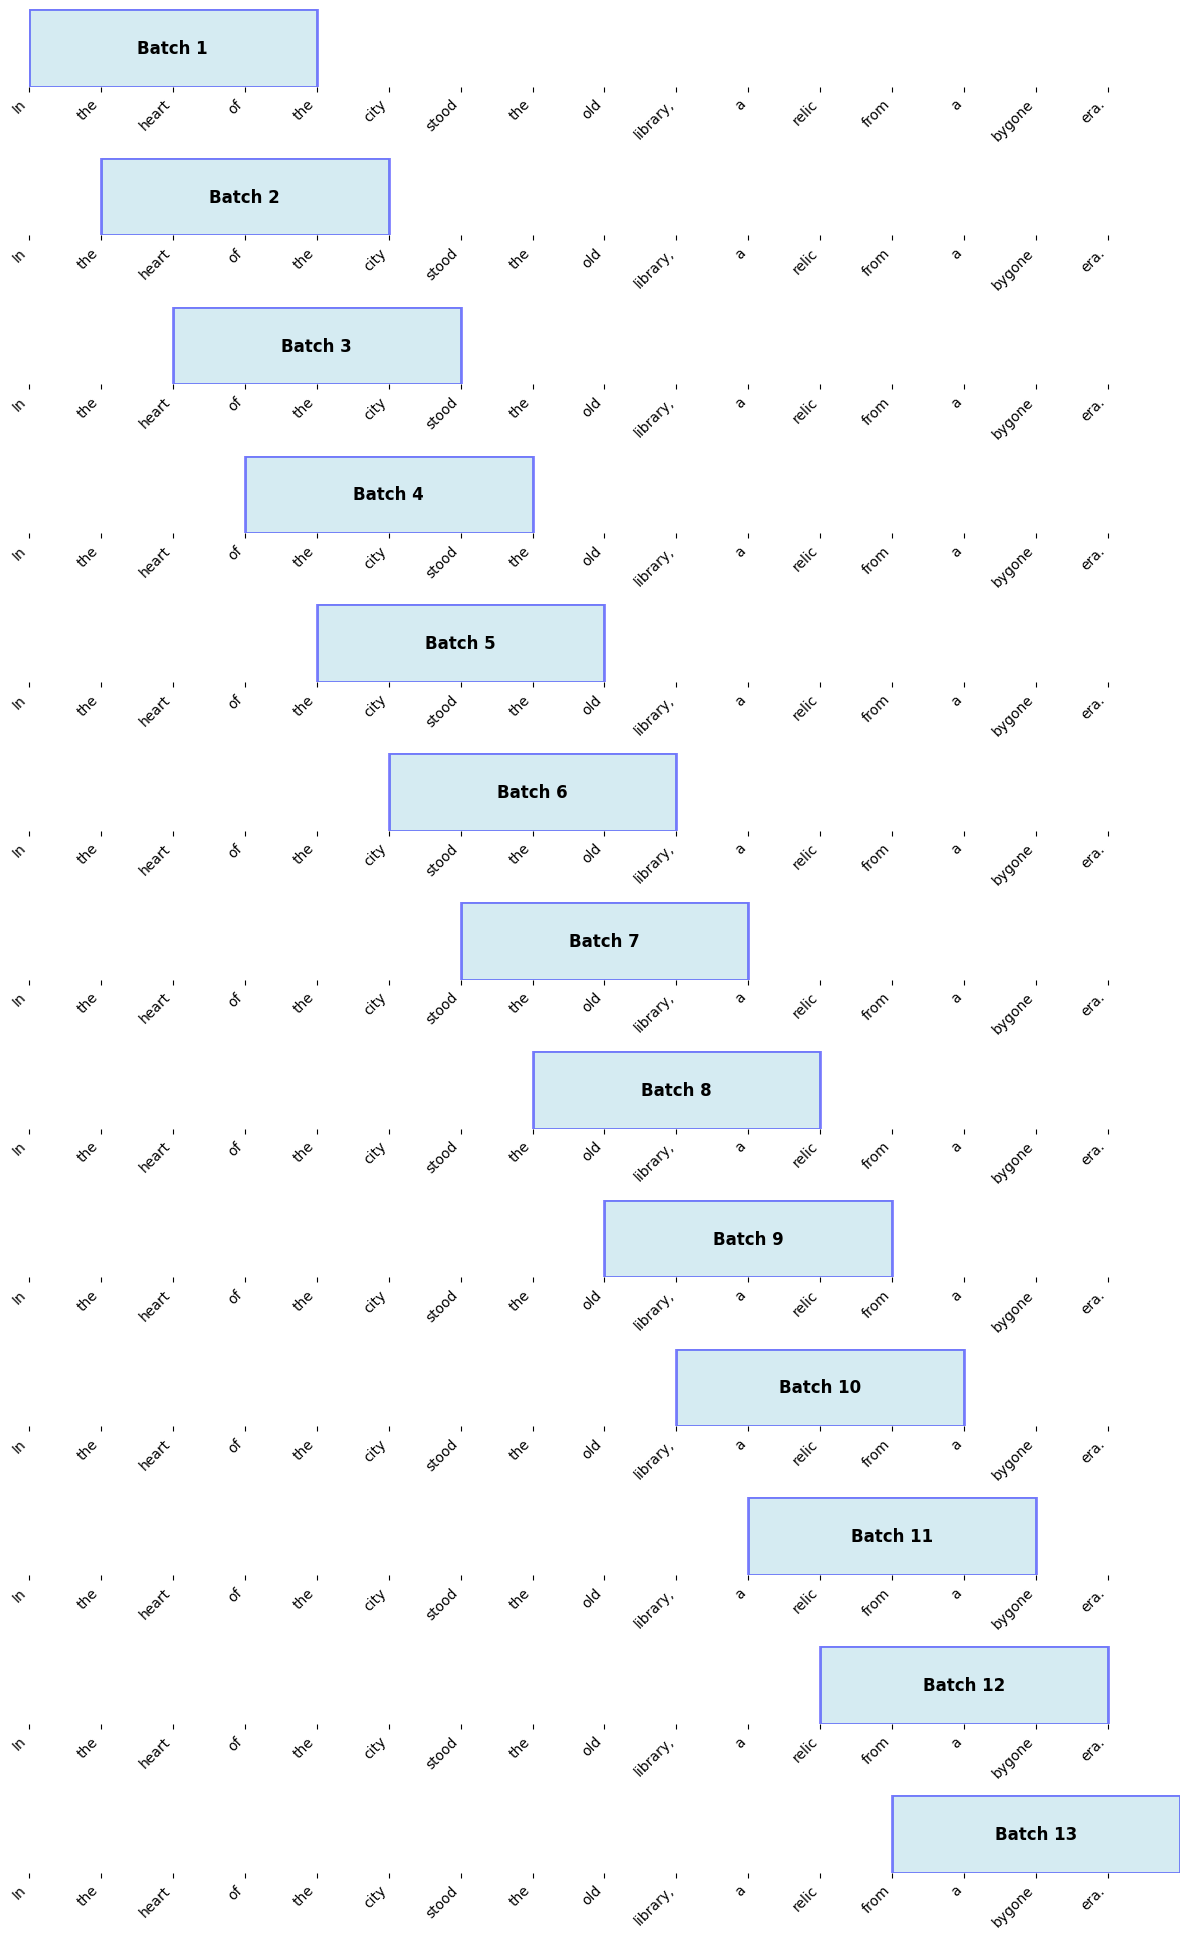

Stride = 4


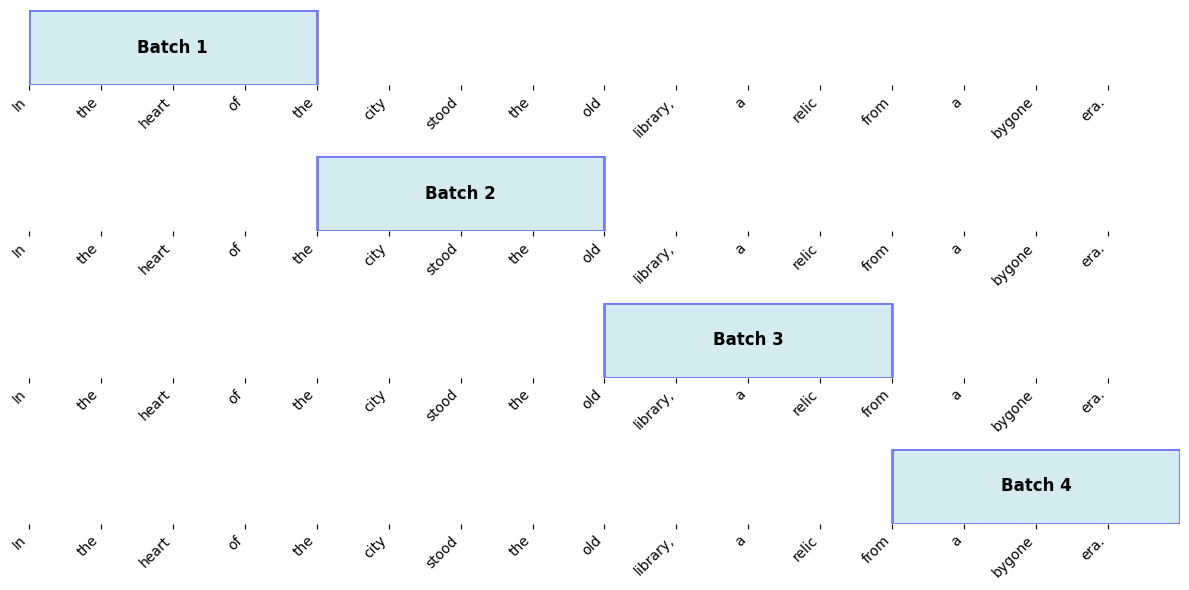

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_stride(text, max_length=4, stride=1):
    """Visualizes how input sequences shift with different stride values."""
    words = text.split()
    num_batches = (len(words) - max_length) // stride + 1

    fig, axes = plt.subplots(num_batches, 1, figsize=(12, num_batches * 1.5))

    for i in range(num_batches):
        ax = axes[i] if num_batches > 1 else axes
        ax.set_xlim(0, len(words))
        ax.set_ylim(0, 1)
        ax.set_xticks(range(len(words)))
        ax.set_xticklabels(words, rotation=45, ha="right", fontsize=10)
        ax.set_yticks([])
        ax.set_frame_on(False)

        start_idx = i * stride
        end_idx = start_idx + max_length
        rect = patches.Rectangle((start_idx, 0), max_length, 1, linewidth=2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
        ax.add_patch(rect)

        # Annotate batch
        ax.text(start_idx + max_length / 2, 0.5, f'Batch {i+1}', fontsize=12, va='center', ha='center', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Example text
sample_text = "In the heart of the city stood the old library, a relic from a bygone era."

# Visualize different stride values
print("Stride = 1")
visualize_stride(sample_text, max_length=4, stride=1)

print("Stride = 4")
visualize_stride(sample_text, max_length=4, stride=4)

In [ ]:
print("Second batch : ", next(data_iter))  # we have stride=1

Second batch :  [tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [ ]:
print("Third batch: ", next(data_iter)) # Autoregressive behaviour

Third batch:  [tensor([[2885, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


<div class="alert alert-info">
If we compare the first and second batch, we can see that the second's batch token ID's are shifted y one position compared to the first batch.

The stride setting dictates the number of positions of the inputs shift across batches, emulating a sliding window approach.
</div>

In [ ]:
#effect of batch sizes
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter=iter(dataloader)
inputs, targets= next(data_iter)
print("Inputs:\n", inputs)
print("Outputs:\n", targets) #outputs shifted by 1 context size

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


<div class="alert alert-danger">
 Since we've set stride=4, which has not overlapping between the words, this helps prevent overfitting
 </div>

In [ ]:
#for batch_size=3
dataloader = create_dataloader_v1(raw_text, batch_size=3, max_length=4, stride=4, shuffle=False)

data_iter=iter(dataloader)
inputs, targets= next(data_iter)
print("Inputs:\n", inputs)
print("Outputs:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026]])
Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632]])


# Level 5 : Token/ Vector Embeddings

<div class="alert alert-success">
calling it word embeddings will not be good coz, token can be words, subwords, or characters, hence token is a broader term
</div>

```mermaid
graph TD;
    A["Input Text: This is an example"] --> B["Step 1: Tokenization"]
    B --> C["Tokenized Text: ['This', 'is', 'an', 'example']"]
    C --> D["Step 2: Convert to Token IDs"]
    D --> E["Token IDs: [4013, 201, 302, 1134]"]
    E --> F["Step 3: Token Embeddings"]
    F --> G["Embeddings passed to GPT model"]


In [ ]:
!pip install huggingface_hub gensim==4.3.0
!pip install numpy --upgrade --force-reinstall
# !pip install numpy==1.26.0 --upgrade --force-reinstall

# !pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.0

!pip uninstall -y numpy scipy gensim

!pip install --upgrade --force-reinstall \
  "numpy==1.23.5" \
  "scipy==1.10.1" \
  "gensim==4.3.0" \
  "huggingface_hub==0.15.1"  #restart the session once after installed

# !pip uninstall -y numpy scipy gensim

# !pip install --upgrade --force-reinstall \
#   numpy==1.23.5 \
#   scipy==1.10.1 \
#   gensim==4.3.0 \
#   huggingface_hub==0.15.1

In [ ]:
# !pip uninstall -y numpy scipy gensim

# !pip install --upgrade --force-reinstall \
#   numpy==1.23.5 \
#   scipy==1.10.1 \
#   gensim==4.3.0 \
#   huggingface_hub==0.15.1

### Using a pretrained `word2vec-google-news-300` model

In [ ]:
from huggingface_hub import hf_hub_download
import gensim.downloader as api
model=api.load("word2vec-google-news-300")

In [ ]:
word_vectors=model

#let us look how the vector embedding of a word looks like
print(word_vectors['computer'])

In [ ]:
print(word_vectors['car'].shape)  #300 dimesnional vector

In [ ]:
# let us look at how it captures semantic realtion between king+woman-man=?


#Example of using most_similar
print(word_vectors.most_similar(positive=['song', 'singer'], negative=['man']))

In [ ]:
# let us look at similarity between two different words
print(word_vectors.similarity('cat', 'dog')* 100)
print(word_vectors.similarity('woman', 'man')*100)
print(word_vectors.similarity('man', 'man')*100)
print(word_vectors.similarity('nephew', 'niece')*100)
print(word_vectors.similarity('bat', 'ball')*100)
print(word_vectors.similarity('stone', 'water')*100)
print(word_vectors.similarity('uncle', 'sister')*100)
print(word_vectors.similarity('song', 'music')*100)

In [ ]:
# most similar words
print(word_vectors.most_similar("house", topn=6))  # shows similar words

In [ ]:
print(word_vectors.most_similar("roof", topn=7))

<div class="alert alert-info">
Let us now see the vector similarity
</div>

In [ ]:
import numpy as np
#words to compare
word1='man'
word2='woman'

word3='semiconductor'
word4='earthworm'

word5='nephew'
word6='niece'

#calculate the vector difference
vector_difference1=word_vectors[word1]-word_vectors[word2]
vector_difference2=word_vectors[word3]-word_vectors[word4]
vector_difference3=word_vectors[word5]-word_vectors[word6]

#calculate the magnitude of the vector difference
magnitude_of_difference1=np.linalg.norm(vector_difference1)
magnitude_of_difference2=np.linalg.norm(vector_difference2)
magnitude_of_difference3=np.linalg.norm(vector_difference3)

#print the magnitude of the difference
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word1, word2, magnitude_of_difference1))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word3, word4, magnitude_of_difference2))
print("The magnitude of the difference between '{}' and '{}' is {:.2f}".format(word5, word6, magnitude_of_difference3))

<div class="alert alert-warning">
  <h5>let us now look at how token embeddings are created for LLMs </h5>
</div>

### Creating Token embeddings

<div class="alert alert-success">
Let's illustrate hoe the token ID to embedding vector conversion works with a hands-on example. Suppose we have the following
</div>

In [ ]:
import torch
input_ids=torch.tensor([2,3,5,1]) # remember these 2,3,5 and 1 are token id's

In [ ]:
print(input_ids)

tensor([2, 3, 5, 1])


using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility

In [ ]:
vocab_size=9 # quick fox is in the house(let's say)
output_dim=3

torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size, output_dim)

The print statement in the code prints the embedding layer's underlying weight matrix:

In [ ]:
print(embedding_layer) #9 X 3 matrix

Embedding(9, 3)


In [ ]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035],
        [-0.5880,  0.3486,  0.6603],
        [-0.2196, -0.3792,  0.7671],
        [-1.1925,  0.6984, -1.8061],
        [ 1.8960, -0.1750,  1.3689],
        [-1.6033, -1.3250,  0.1784],
        [-2.1338,  0.7953,  0.9985],
        [ 0.2212,  1.8319, -0.3378],
        [ 0.8805,  1.5542,  0.6266]], requires_grad=True)


<div class="alert alert-info">
we can see that the weight matrix of the embedding layer contain small, random values. These values are optimized during LLM training as part of the LLM optimization itself,as we will see in the upcoming chapters. Moreover, we can see that the weight matrix has 6 rows and 3 columns. There is one row for each of the six possible tokens in the vocabulary. And there is one column for each of the three embedding dimensions.
</div>

After we instantiated the embedding layer, let's now apply it to a token ID to obtain the embedding vector:

In [ ]:
print(embedding_layer(torch.tensor([3]))) # shows the corresponding dimensional row of the indexed token ID

tensor([[-1.1925,  0.6984, -1.8061]], grad_fn=<EmbeddingBackward0>)


In [ ]:
input_ids=torch.tensor([2,3,5,1])

In [ ]:
print(embedding_layer(input_ids)) # the corresponding row is the vector embedding of the particular token ID

tensor([[-0.2196, -0.3792,  0.7671],
        [-1.1925,  0.6984, -1.8061],
        [-1.6033, -1.3250,  0.1784],
        [-0.5880,  0.3486,  0.6603]], grad_fn=<EmbeddingBackward0>)


In [ ]:
!pip install datasets

In [ ]:
with open("the-verdict.txt","r", encoding="utf-8") as f:
    raw_text=f.read()

In [ ]:
print(len(raw_text))

20479


In [ ]:
print()

# Level 6: Positional Embeddings

Previously we've focused on very small embedding sizes in this chapter for illustration purposes.

We now consider more realistic and useful embedding sizes and encode the input tokens into a 256-dimensional vector representation.

This is smaller than the original GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable for experimentation.

Furthermore, we assume that the token ID's were created by the BPE tokenizer that we implemented earlier, which has a vocabulary size of 50,257:

In [ ]:
vocab_size =50257
output_dim =256

token_embedding_layer=torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
#token_embedding_layer.weight.shape
print(token_embedding_layer)

Embedding(50257, 256)


In [ ]:
#passing a particular tensor value, returns the embedding row of that particular index
print(token_embedding_layer(torch.tensor([50256])))

tensor([[-0.2843,  0.5639,  0.4753, -0.9251, -1.1422,  0.1763,  1.2032,  0.1499,
          0.5718,  1.4336,  1.2597,  1.6921,  0.5777,  1.6055, -0.5873, -0.2279,
          0.6450,  0.3158, -0.8209,  0.1448, -0.2698,  0.2598, -0.8569,  0.2987,
          1.9253,  1.8157,  0.6846,  0.6714,  0.9664,  0.0468, -1.9957,  1.4302,
         -0.3879, -0.8162, -0.2007,  0.9735, -0.1687,  0.2578,  0.7501,  1.1882,
          1.3766, -0.3548, -2.4812,  0.7916, -0.3279, -0.2348,  0.6498,  0.7423,
          1.0860, -0.2790,  0.8057,  0.0702, -0.6110,  0.1765,  0.3863, -0.9992,
          0.2773,  1.2854,  0.8414,  0.9201,  0.5888, -0.4976, -1.3764,  0.7894,
          0.2925, -0.4276, -1.2556, -0.4862, -0.4990,  0.6122,  0.4845,  0.7123,
         -0.8274, -1.0233,  0.6322, -1.4701, -0.7703,  1.2836,  2.8357, -1.3476,
         -1.1242, -2.1918,  1.3822,  0.3493, -0.9951,  0.6062,  0.7917, -0.8728,
         -1.9890,  1.5068,  0.0356,  0.5441, -0.8563,  1.6336,  0.7532,  0.5349,
         -0.4382,  0.7501,  

<div class="alert alert-danger">
Using the token_emebdding_layer above, if we sample data from the data loader, we embed each token in each batch with a batch_size of 8 with four tokens each, the result will be an 8 x 4 x 256 tensor.
</div>

Let's instantaiate the Data Loader (Data Sampling with a
 sliding window), first:

In [ ]:
import tiktoken
from torch.utils.data import Dataset, DataLoader

In [ ]:
max_length=4
dataloader=create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False
    )

data_iter=iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)
print("\nOutput IDs:\n", targets)
print("\nOutputs shape:\n", targets.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])

Output IDs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])

Outputs shape:
 torch.Size([8, 4])


In [ ]:
token_embeddings=token_embedding_layer(inputs)
print("Shape of token_embedding_layer: ", token_embedding_layer)
print("shape of token_embeddings: ", token_embeddings.shape)

Shape of token_embedding_layer:  Embedding(50257, 256)
shape of token_embeddings:  torch.Size([8, 4, 256])


In [ ]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length, output_dim)
print(pos_embedding_layer.weight.shape)

torch.Size([4, 256])


In [ ]:
torch.arange(start=8, end=16, step=2)   #returns a 1D tensor of size = [end-start]/step

tensor([ 8, 10, 12, 14])

In [ ]:
pos_embeddings= pos_embedding_layer(torch.arange(max_length))   # will return a 1D tensor with values: tensor([0,1,2,3])
print(pos_embeddings.shape)

torch.Size([4, 256])


In [ ]:
print(pos_embeddings)

tensor([[ 0.5874, -0.4354, -1.0029,  ..., -0.0893, -0.5755,  0.8312],
        [ 0.6477, -0.0762,  1.7831,  ...,  0.0491,  1.3986, -2.5311],
        [ 0.9033, -0.2303, -0.3510,  ..., -0.8137, -0.3211,  0.7578],
        [ 0.4214, -0.0861,  0.0188,  ..., -1.9325,  0.2861,  0.5652]],
       grad_fn=<EmbeddingBackward0>)


<div class="alert alert-block alert-info">
    
As we can see, the positional embedding tensor consists of four 256-dimensional vectors.
We can now add these directly to the token embeddings, where PyTorch will add the 4x256-
dimensional pos_embeddings tensor to each 4x256-dimensional token embedding tensor in
each of the 8 batches:
    
</div>

In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)  #8 = batch_size, 4 = context_size, 256=dimensional vector
print(token_embeddings.shape)
print(pos_embeddings.shape) # this pos_embedding gets broadcasted 8 times(no.of rows in batch_size times) when added with token_embeddings, hence it gets add withtoken-embeddings with same dimension

torch.Size([8, 4, 256])
torch.Size([8, 4, 256])
torch.Size([4, 256])


<div class="alert alert-info">
In the just above cell,
this pos_embedding gets broadcasted 8 times(no.of rows in batch_size times) when added with token_embeddings, hence it's dimension becomes match with token-embeddings, and gets added, forming input_embeddings dimension to [8,4,256]

</div>

In [ ]:
# print(token_embeddings)

# Level 7: The entire Data_processing pipeline of LLMs

<div class="alert alert-success">
All the things implemented till now comes under data-processing stage, where a raw_text if processed for inputs to the model training.
</div>

# Level 8: Introduction to the Attention mechanisms

## Implementing `Simplified Self Attention` mechanism

### without `trainable weights`

<div class="alert alert-info">

Consider the following input sequence , which has already been embedded into 3-dimensional vectors.

We choose the small embedding dimension for illustration purposes to ensure it fits on the page without line breaks:
</div>

In [1]:
#consider the input text: Your journey starts with one step
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your      (x^1)
     [0.55, 0.87, 0.66],  # journey   (x^2)
     [0.57, 0.85, 0.64],  # starts    (x^3)
     [0.22, 0.58, 0.33],  # with      (x^4)
     [0.77, 0.25, 0.10],  # one       (x^5)
     [0.05, 0.80, 0.55]]  # step      (x^6)
)

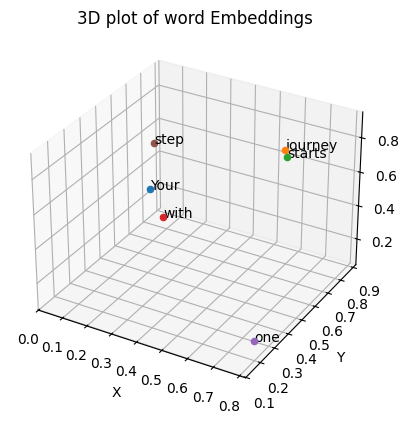

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#corresponding words
words=['Your','journey', 'starts', 'with', 'one', 'step']

#extract x,y,z coordinates
x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot each point and annotate with corresponding word
for x,y,z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, color='black', fontsize=10)

#set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#show the plot
plt.title('3D plot of word Embeddings')
plt.show()

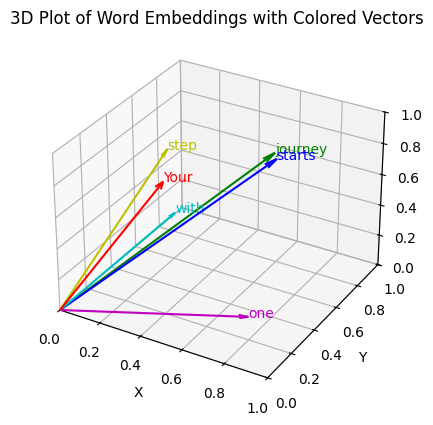

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Set title
plt.title('3D Plot of Word Embeddings with Colored Vectors')

plt.show()


<h3>Each row represnts a word, and each column represents an embedding dimension </h3>

From the above illustration we can say that the words `journey` and `starts` are semantically related.

First step of implementing self-attention is to compute the intermediate values `w` also referrred to as attention scores.

If two vectors are aligned to each other,it means the angle between them is 0, & `cos0=1, dot product will be maximnum`.

if they are perpendicular, `cos90=0, means their dot product will be minimum`.

the second input token serves as the query

In [4]:
query=inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) #dot product

print(attn_scores_2)
print(x_i)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.0500, 0.8000, 0.5500])


<div class="alert alert-success">

The above cell is calculating the dot product between a `query vector` and each of the `input word vectors`, higher values shows closer alignments

</div>

In [5]:
# #just for understanding
# a=torch.tensor([3.65])
# b=torch.tensor([4.65])
# c=torch.dot(a,b)
# torch.is_tensor(c)
# print(c)

since the values are greater than zeros which is not a good representation, hence we need to normalize them

In [6]:
attn_weights_2_tmp=attn_scores_2/attn_scores_2.sum()

print(attn_weights_2_tmp)
print(attn_weights_2_tmp.sum()) # all the vectors must sum up to 1

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In practice, it's more common to use the `softmax function` for normalization

In [7]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weights_2_naive =softmax_naive(attn_scores_2)
print(attn_weights_2_naive)
print(attn_weights_2_naive.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


<div class="alert alert-warning">
Note that this naive softmax may encounter numerical instability problems, such as overflow and underflow, when dealing with large or small input values.
Therefore, in practice it's advisable to use the PyTorch Implementation of softmax,which  has been extenisvely optimized for performance:
</div>

In [8]:
attn_weights_2= torch.softmax(attn_scores_2, dim=0)
print("Attention weights: ", attn_weights_2)
print("Sum of attention weights: ", attn_weights_2.sum())

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights:  tensor(1.)


After computing the normalized attention weights, we calculate the `context vectors` by multiplying the `embedded input tokens` with their corresponding `attention weights` and then summing the resultant vectors.

In [9]:
query = inputs[1]

context_vec_2=torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
  context_vec_2+=attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [10]:
print(x_i) # this prints embedded input token at (i=5)

tensor([0.0500, 0.8000, 0.5500])


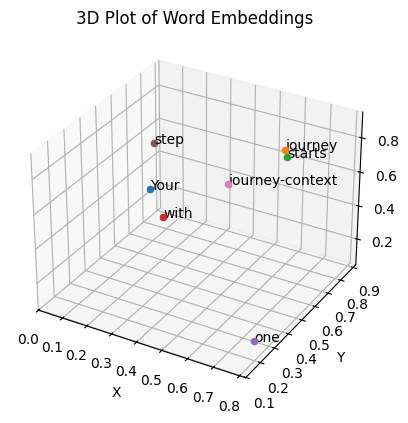

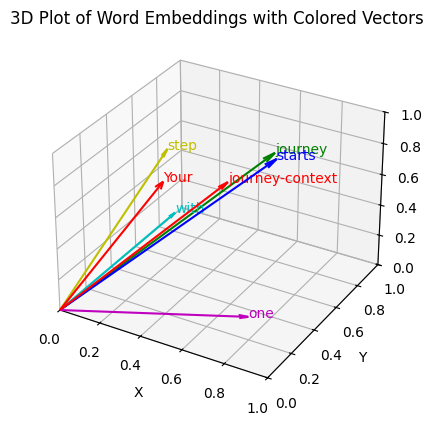

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [12]:
# Just for understanding how context_vector is calculated mathematically
# Define input embeddings
inputs = torch.tensor([
    [0.43, 0.15, 0.89],  # Your      (x^1)
    [0.55, 0.87, 0.66],  # journey   (x^2)
    [0.57, 0.85, 0.64],  # starts    (x^3)
    [0.22, 0.58, 0.33],  # with      (x^4)
    [0.77, 0.25, 0.10],  # one       (x^5)
    [0.05, 0.80, 0.55]   # step      (x^6)
])

# Define attention weights(calulated after torch.softmax)

attn_weights_2 = torch.tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

# Compute context vector (weighted sum of embeddings)
context_vec_2 = torch.sum(attn_weights_2[:, None] * inputs, dim=0)

# Output the computed context vector
context_vec_2
#this resultant context_vec_2 is shown in the above graph as "journey_context"

tensor([0.4419, 0.6515, 0.5683])

<div class="alert alert-success">

Till here we have calculated the context_vector for `query=input[1]`, similarly we need to calculate the same for each of the word_vectors, the whole of this computation can be shown as a matrix below:

</div>

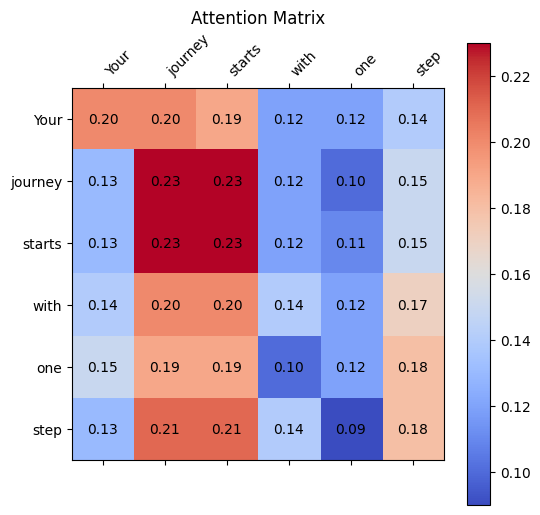

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the attention matrix
attention_matrix = np.array([
    [0.20, 0.20, 0.19, 0.12, 0.12, 0.14],
    [0.13, 0.23, 0.23, 0.12, 0.10, 0.15],
    [0.13, 0.23, 0.23, 0.12, 0.11, 0.15],
    [0.14, 0.20, 0.20, 0.14, 0.12, 0.17],
    [0.15, 0.19, 0.19, 0.10, 0.12, 0.18],
    [0.13, 0.21, 0.21, 0.14, 0.09, 0.18]
])

words = ["Your", "journey", "starts", "with", "one", "step"]

fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(attention_matrix, cmap="coolwarm")

# Add values to cells
for i in range(len(words)):
    for j in range(len(words)):
        ax.text(j, i, f"{attention_matrix[i, j]:.2f}", ha='center', va='center', color='black')

# Set axis labels
ax.set_xticks(np.arange(len(words)))
ax.set_yticks(np.arange(len(words)))
ax.set_xticklabels(words, rotation=45, ha="left")
ax.set_yticklabels(words)

plt.colorbar(cax)
plt.title("Attention Matrix")
plt.show()


We now need to calculate the attention weights for other words input text as well in the same way as we've done for `journey`

In [14]:
# attention_score between all pairs
attn_scores=torch.empty(6,6)

for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i,j]=torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [15]:
# a smart way to do the same is by multiplying each input vector with transpose
attn_scores= inputs @ inputs.T #torch.matmul(inputs, inputs.T)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [16]:
attn_weights= torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [17]:
all_context_vects=torch.matmul(attn_weights, inputs)#attn_weights @ inputs
print(all_context_vects)
#In the all_conetxt_vects the values are basically scaled by inputs times

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


<div class="alert alert-info">

We have implemented semantic meanings between words by capturing alignment using the dot product, but we also need to capture the context of the sentence. Without trainable weights, we cannot effectively capture context. Right now, we give attention to words that are similar in meaning, but even words that are not similar in meaning deserve attention based on the context.

</div>

### with `trainable weights`

Here we will learn about the Self-Attention mechanism used in the original transformer architectue, the GPT models and most other popular LLMs. This Self attention mechanism is also called as "scaled-dot product attention"

We will follow the same three steps as before:

1. **Compute Attention Scores**  
   → Compute the attention scores as dot products between the inputs.  

2. **Compute Attention Weights**  
   → The attention weights are a normalized version of the attention scores.  

3. **Compute Context Vectors**  
   → The context vectors are computed as a weighted sum over the inputs.  


The Self attention mechanisms and all its types are the **engine** of the transformers

In [2]:
import torch

inputs = torch.tensor([
    [0.43, 0.15, 0.89],  # Your      (x^1)
    [0.55, 0.87, 0.66],  # journey   (x^2)
    [0.57, 0.85, 0.64],  # starts    (x^3)
    [0.22, 0.58, 0.33],  # with      (x^4)
    [0.77, 0.25, 0.10],  # one       (x^5)
    [0.05, 0.80, 0.55]   # step      (x^6)
])

In [3]:
x_2= inputs[1] #vector: journey
d_in=inputs.shape[1] # 3 #shape[0] corresponding to no. of rows, and shape[1] corresponds to no. of columns
d_out=2

In [5]:
print(x_2)

tensor([0.5500, 0.8700, 0.6600])


In [6]:
print( d_in)

3


In [4]:
a=torch.manual_seed(123)
W_query=torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)  #3x2
W_key=torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)   #3x2
W_value=torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=False)   #3x2

In [7]:
print(W_query)  # trainable weight matrix for query
print("\n",W_key)   # trainable weight matrix for key
print("\n",W_value)  # trainable weight matrix for value

Parameter containing:
tensor([[-0.1115,  0.1204],
        [-0.3696, -0.2404],
        [-1.1969,  0.2093]])

 Parameter containing:
tensor([[-0.9724, -0.7550],
        [ 0.3239, -0.1085],
        [ 0.2103, -0.3908]])

 Parameter containing:
tensor([[ 0.2350,  0.6653],
        [ 0.3528,  0.9728],
        [-0.0386, -0.8861]])


In [10]:
query_2 = x_2 @ W_query  # 1x3 3x2  = 1x2
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)
print(key_2)
print(value_2)

tensor([-1.1729, -0.0048])
tensor([-0.1142, -0.7676])
tensor([0.4107, 0.6274])


In [11]:
keys= inputs @ W_key  # 6x3 3x2 = 6x2
values= inputs @ W_value
queries= inputs @ W_query

print(keys.shape)
print(values.shape)
print(queries.shape)

torch.Size([6, 2])
torch.Size([6, 2])
torch.Size([6, 2])


<div class="alert alert-info">

So we can say from the outputs, we succesfully projected the 6 input tokens form a 3D embedding space onto a 2D embedding space.

</div>

In [26]:
#First let's compute the attention score omega22
keys_2=keys[1] #1x2  ; key for journey
attn_scores_22= query_2.dot(keys_2)
print(attn_scores_22)
print(query_2)

tensor(0.1376)
tensor([-1.1729, -0.0048])


<div class="alert alert-success">

Again, we can generalize this computation to all attention scores via matrix multiplication.

</div>

In [15]:
attn_scores_2=query_2 @keys.T  #1*2 2x6 = 1x6
print(attn_scores_2)

tensor([ 0.2172,  0.1376,  0.1730, -0.0491,  0.7616, -0.3809])


In [16]:
attn_scores = queries @ keys.T #6x2 2x6 = 6x6
print(attn_scores)

tensor([[ 0.0740, -0.0216,  0.0126, -0.1230,  0.6250, -0.4498],
        [ 0.2172,  0.1376,  0.1730, -0.0491,  0.7616, -0.3809],
        [ 0.2098,  0.1320,  0.1665, -0.0489,  0.7408, -0.3725],
        [ 0.1458,  0.1061,  0.1254, -0.0118,  0.4384, -0.1919],
        [ 0.0175, -0.0071,  0.0017, -0.0321,  0.1580, -0.1153],
        [ 0.2240,  0.1642,  0.1935, -0.0161,  0.6667, -0.2888]])


Now we need to calculate attn_weights, the above calculated are the attention scores, which are not normalized and random values, the attn_weights are the normalized values.

<div class="alert alert-success">

We compute the attention weights by scaling the attention scores and using the softmax function we used earlier.

The difference to earlier is that we now scale the attention scores by dividing them by the square root of the embedding dimension of the keys.

Note that taking the square root is mathematically the same as exponentiating by 0.5:

</div>

In [17]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)   #attention weights of the journey vector
print(d_k)

tensor([0.1704, 0.1611, 0.1652, 0.1412, 0.2505, 0.1117])
2


In [18]:
attn_weights= torch.softmax(attn_scores/d_k**0.5, dim=-1)
print(attn_weights)

tensor([[0.1687, 0.1576, 0.1615, 0.1467, 0.2490, 0.1165],
        [0.1704, 0.1611, 0.1652, 0.1412, 0.2505, 0.1117],
        [0.1704, 0.1613, 0.1653, 0.1419, 0.2481, 0.1129],
        [0.1704, 0.1656, 0.1679, 0.1524, 0.2095, 0.1342],
        [0.1680, 0.1651, 0.1661, 0.1622, 0.1856, 0.1529],
        [0.1711, 0.1640, 0.1675, 0.1444, 0.2340, 0.1191]])


We now compute the context vector as a weighted sum over the value vectors.

Here, the attention weights serve as a weighting factor that weighs the respective importance of each value vector.

We can use matrix multiplication to obtain the output in one step:

In [20]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)  #context vector for journey

tensor([0.2854, 0.4081])


In [21]:
#context vector for each input vector
context_vec=attn_weights @values
print(context_vec)

tensor([[0.2845, 0.4071],
        [0.2854, 0.4081],
        [0.2854, 0.4075],
        [0.2864, 0.3974],
        [0.2863, 0.3910],
        [0.2860, 0.4039]])


#### SelfAttention_v1

In [23]:
import torch .nn as nn

class SelfAttention_v1(nn.Module):

  def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query=nn.Parameter(torch.rand(d_in, d_out))
    self.W_key=nn.Parameter(torch.rand(d_in, d_out))
    self.W_value=nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):  #x:input embedding vector
    keys=x @ self.W_key
    queries= x @ self.W_query
    values= x @ self.W_value

    attn_scores=queries @keys.T  #omega
    attn_weights =torch.softmax(
        attn_scores/keys.shape[-1]**0.5, dim=-1
    )

    context_vec=attn_weights @ values
    return context_vec

In [27]:
torch.manual_seed(123)
sa_v1=SelfAttention_v1(d_in, d_out) #3x2
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


<div class="alert alert-warning">
Since inputs contains six embedding vectors, we get a matrix storing the six context vectors, as shown in the above result.
</div>

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of context_vec_2 in the previous section.

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's nn.Linear layers, which effectively perform matrix multiplication when the bias units are disabled.

Additionally, a significant advantage of using nn.Linear instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight initialization scheme, contributing to more stable and effective model training.

In [30]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [33]:
torch.manual_seed(789)
sa_V2=SelfAttention_v2(d_in, d_out)
print(sa_V2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
